In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# load data
train = pd.read_csv('../../airbnb_project_data/train_users_2.csv')
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [3]:
# check for null values in the dataset
train.loc[train.age > 95, 'age'] = np.nan
train.loc[train.age < 18, 'age'] = np.nan
train.gender.replace('-unknown-', np.nan, inplace=True)
train_nan = (train.isnull().sum() / train.shape[0]) * 100
train_nan[train_nan > 0]

date_first_booking         58.347349
gender                     44.829024
age                        42.438780
first_affiliate_tracked     2.841402
dtype: float64

       country_destination  percentage
NDF                 124543    0.583473
US                   62376    0.292226
other                10094    0.047290
FR                    5023    0.023532
IT                    2835    0.013282
GB                    2324    0.010888
ES                    2249    0.010536
CA                    1428    0.006690
DE                    1061    0.004971
NL                     762    0.003570
AU                     539    0.002525
PT                     217    0.001017


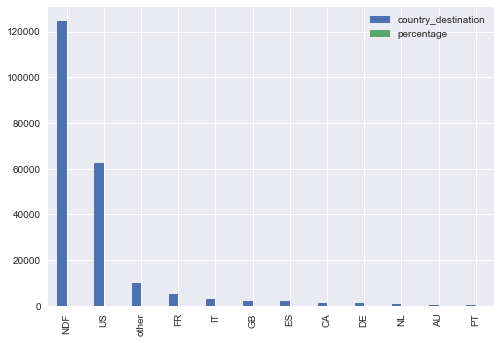

In [34]:
# explore the fraction of each class in the output
country_dis = pd.DataFrame(train.country_destination.value_counts())
country_dis['percentage'] = country_dis.country_destination/len(train.country_destination)
print(country_dis)
country_dis.plot(kind='bar')

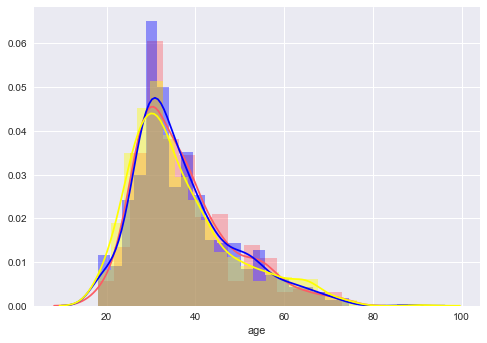

In [5]:
# explore the age distribution for different output classes
au = train[train.country_destination == 'AU']
ca = train[train.country_destination == 'CA']
de = train[train.country_destination == 'DE']
sns.distplot(au.age.dropna(), color='#FD5C64')
plt.xlabel('Age')
sns.despine()
sns.distplot(ca.age.dropna(), color='blue')
sns.distplot(de.age.dropna(), color='yellow')

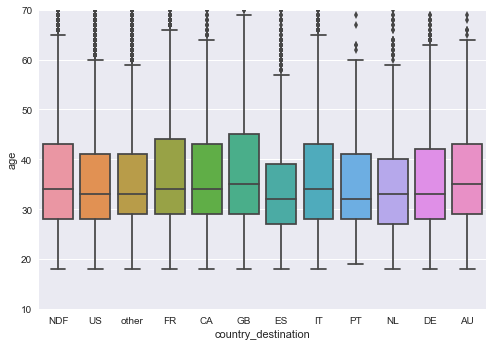

In [6]:
# more on the age distribution for different output classes
sns.boxplot(train['country_destination'],train['age'])
sns.plt.ylim(10, 70)
sns.despine()

In [21]:
# extract information on account creation dates
date = train.date_account_created
year = []
month = []
day = []
create_time = []
for i in date:
    y, m, d = i.split('-')
    year.append(int(y))
    month.append(int(m))
    day.append(int(d))
    create_time.append(pd.Timestamp(i))

In [22]:
# extract information on first booking dates
date2 = train.date_first_booking
year2 = []
month2 = []
day2 = []
for i in date2:
    if type(i) == float:
        y = m = d = np.nan
    else:
        y, m, d = i.split('-')
    year2.append(y)
    month2.append(m)
    day2.append(d)

In [23]:
# extract information on first active dates
year3 = []
month3 = []
day3 = []
active_time = []
for i in train.timestamp_first_active:
    year3.append((int(str(i)[0:4])))
    month3.append((int(str(i)[4:6])))
    day3.append((int(str(i)[6:8])))
    active_time.append(pd.Timestamp(str(i)[0:8]))

In [29]:
# group by the year of first active date
pd.Series(year3).value_counts()

2013    82950
2014    76430
2012    39475
2011    11794
2010     2797
2009        5
dtype: int64

In [30]:
# group by the month of first active date
pd.Series(month3).value_counts()

6     27427
5     25906
4     21876
3     20326
1     17491
2     16580
9     15389
8     14612
7     13836
10    13478
12    13400
11    13130
dtype: int64

In [24]:
# calculate the gap months between account creation date and first active date
gap_month = []
for i in range(len(year)):
    gap_year = year[i] - year3[i]
    if gap_year == 0:
        gap = month[i] - month3[i]
    elif gap_year > 0:
        gap = 12*(gap_year-1) + (12-month3[i]) + month[i]
    gap_month.append(gap)

In [25]:
pd.Series(gap_month).value_counts()

0     213302
1         21
4         11
3         10
5         10
8          9
6          8
11         8
2          7
10         6
12         6
15         5
7          4
9          4
21         4
13         3
17         3
19         3
23         3
45         2
25         2
33         2
32         2
26         2
24         2
22         2
20         2
14         2
27         1
28         1
29         1
34         1
38         1
48         1
dtype: int64

In [16]:
# calculate the gap days between account creation date and first active date
gap = []
for i in range(len(create_time)):
    gap.append((create_time[i] - active_time[i]).days)

In [17]:
pd.Series(gap).value_counts()

0       213273
1            7
2            4
6            4
7            4
3            3
4            3
29           3
5            3
176          2
40           2
37           2
163          2
9            2
20           2
95           2
312          2
103          2
104          2
722          2
57           2
634          2
137          1
154          1
132          1
259          1
31           1
35           1
514          1
167          1
         ...  
448          1
65           1
322          1
451          1
710          1
838          1
328          1
74           1
331          1
587          1
76           1
204          1
78           1
80           1
349          1
337          1
1361         1
210          1
466          1
595          1
851          1
86           1
216          1
1369         1
218          1
91           1
92           1
476          1
732          1
447          1
Length: 143, dtype: int64

In [31]:
# explore the relationship between gender and output country
train.gender.replace(np.nan, 'Nan', inplace=True)
train.gender.replace('OTHER', 'Nan', inplace=True)
a = train.groupby(['gender', 'country_destination']).size().unstack(0)
a

gender,FEMALE,MALE,Nan
country_destination,,,
AU,207,188,144
CA,455,477,496
DE,358,416,287
ES,853,677,719
FR,1962,1335,1726
GB,881,682,761
IT,1091,699,1045
NDF,31048,26719,66776
NL,254,278,230


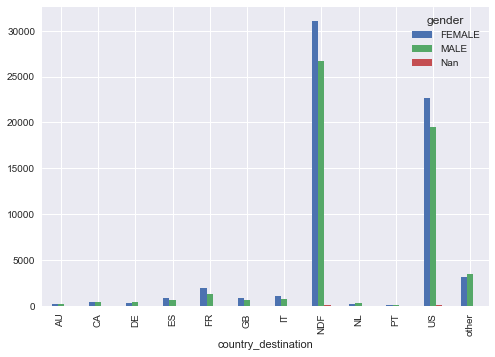

In [28]:
a.plot(kind='bar')

In [110]:
train.gender.value_counts()

Nan       95970
FEMALE    63041
MALE      54440
Name: gender, dtype: int64

In [24]:
train.signup_method.value_counts()

basic       152897
facebook     60008
google         546
Name: signup_method, dtype: int64

In [25]:
train.signup_flow.value_counts()

0     164739
25     14659
12      9329
3       8822
2       6881
24      4328
23      2835
1       1047
6        301
8        240
21       196
5         36
20        14
16        11
15        10
10         2
4          1
Name: signup_flow, dtype: int64

In [26]:
train.language.value_counts()

en    206314
zh      1632
fr      1172
es       915
ko       747
de       732
it       514
ru       389
pt       240
ja       225
sv       122
nl        97
tr        64
da        58
pl        54
cs        32
no        30
th        24
el        24
id        22
hu        18
fi        14
is         5
ca         5
hr         2
Name: language, dtype: int64

(0, 5000)

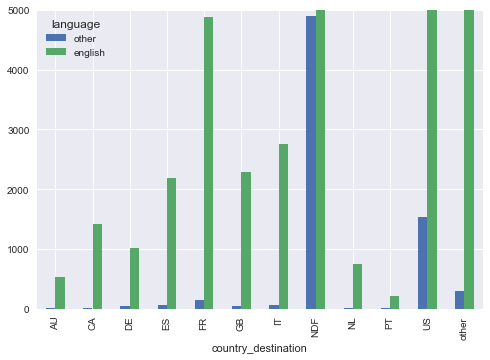

In [61]:
# explore the relationship between language and output country
b = train.groupby(['language', 'country_destination']).size().unstack(0)
b.replace(np.nan, 0, inplace=True)
b['other'] = b.zh + b.fr + b.es + b.ko + b.de + b.it + b.ru + b.pt + b.ja + b.sv + b.nl + b.tr + b.da + b.pl + b.cs + b.no + b.th + b.el + b.id + b.hu + b.fi + b['is'] + b.ca + b.hr
b['english'] = b.en
b.drop(b.columns[0:25], axis=1).plot(kind='bar')
plt.ylim(0, 5000)

In [27]:
train.affiliate_channel.value_counts()

direct           137727
sem-brand         26045
sem-non-brand     18844
other              8961
seo                8663
api                8167
content            3948
remarketing        1096
Name: affiliate_channel, dtype: int64

In [28]:
train.first_affiliate_tracked.value_counts()

untracked        109232
linked            46287
omg               43982
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

In [29]:
train.signup_app.value_counts()

Web        182717
iOS         19019
Moweb        6261
Android      5454
Name: signup_app, dtype: int64

In [62]:
train.first_device_type.value_counts()
#combine desktop(other) and smartphone(other)

Mac Desktop           89600
Windows Desktop       72716
iPhone                20759
iPad                  14339
Other/Unknown         10667
Android Phone          2803
Android Tablet         1292
Desktop (Other)        1199
SmartPhone (Other)       76
Name: first_device_type, dtype: int64

In [66]:
# explore the relationship between device type and output country
train.groupby(['first_device_type', 'country_destination']).size().unstack()

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
first_device_type,,,,,,,,,,,,
Android Phone,1.0,13.0,4.0,13.0,17.0,3.0,13.0,2088.0,5.0,NaN,565.0,81.0
Android Tablet,2.0,11.0,5.0,11.0,23.0,5.0,17.0,832.0,5.0,2.0,314.0,65.0
Desktop (Other),4.0,18.0,13.0,11.0,24.0,8.0,13.0,649.0,5.0,NaN,394.0,60.0
Mac Desktop,265.0,679.0,553.0,1098.0,2593.0,1197.0,1379.0,47350.0,399.0,111.0,29575.0,4401.0
Other/Unknown,18.0,49.0,25.0,61.0,165.0,52.0,57.0,7792.0,19.0,5.0,2141.0,283.0
SmartPhone (Other),NaN,NaN,NaN,NaN,2.0,NaN,1.0,51.0,NaN,NaN,20.0,2.0
Windows Desktop,171.0,520.0,339.0,773.0,1576.0,764.0,969.0,42564.0,222.0,76.0,20910.0,3832.0
iPad,42.0,78.0,62.0,152.0,356.0,159.0,225.0,8875.0,68.0,12.0,3642.0,668.0
iPhone,36.0,60.0,60.0,130.0,267.0,136.0,161.0,14342.0,39.0,11.0,4815.0,702.0


In [63]:
train.first_browser.value_counts()

Chrome                  63845
Safari                  45169
Firefox                 33655
-unknown-               27266
IE                      21068
Mobile Safari           19274
Chrome Mobile            1270
Android Browser           851
AOL Explorer              245
Opera                     188
Silk                      124
Chromium                   73
BlackBerry Browser         53
Maxthon                    46
Apple Mail                 36
IE Mobile                  36
Sogou Explorer             33
Mobile Firefox             30
SiteKiosk                  24
RockMelt                   24
Iron                       17
IceWeasel                  13
Pale Moon                  12
CometBird                  11
SeaMonkey                  11
Yandex.Browser             11
Camino                      9
TenFourFox                  8
wOSBrowser                  6
CoolNovo                    6
Avant Browser               4
Opera Mini                  4
Mozilla                     3
Flock     

In [3]:
train.affiliate_provider.value_counts()

direct                 137426
google                  51693
other                   12549
craigslist               3471
bing                     2328
facebook                 2273
vast                      829
padmapper                 768
facebook-open-graph       545
yahoo                     496
gsp                       453
meetup                    347
email-marketing           166
naver                      52
baidu                      29
yandex                     17
wayn                        8
daum                        1
Name: affiliate_provider, dtype: int64

In [20]:
train.signup_flow.value_counts()

0     164739
25     14659
12      9329
3       8822
2       6881
24      4328
23      2835
1       1047
6        301
8        240
21       196
5         36
20        14
16        11
15        10
10         2
4          1
Name: signup_flow, dtype: int64